In [1]:
# Imports and "global" variables
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

dirname = "/home/austin/research/rogue_cell/"

# Variable definitions
ajf: Line 517 in mt.h
* update - The update the data was written. Remember this is in updates, not generations!

* mean_rep_time - The average number of updates since a multicell last remote replicated (replicated the whole multicell, not tissue accretion). 
    * Averaged across all existing orgs every 100 updates

* mean_res - The average group resources (not individual cell resources, they have to donate those) across all mutlticells every 100 updates. 

* mean_multicell_size - The average number of alive cells (should be all of them) across all multicells taken every 100 updates. 

* mean_mc_tissue_rep_attempts - Of the current multicells, how many local replications (multicell -> multicell) did they *attempt* in the past 100 update?
    - Attempt because the replication need not be successful (always is in the rogue treatment, I believe)

* mean_num_overwritten
    - Math still in discussion. Supposed to be the average number of overwrites (cell replication over an existing cell) over 100 updates across all multicells.
* mean_births_per_mc_cell
    - Math still in discussion. 
* mean_germ_num - The average number of germ cells present *during remote replications* over the last 100 updates. 

* mean_soma_num = mean_pop_num - mean_germ_num (the number of germ cells *during remote replications*

* mean_pop_num - The average number of cells in a multicell *during remote replications* over the last 100 updates
    - This seems to often be higher than mean_multicell_size, possible explanation: multicells often reach their biggest size just before remote replication

* mean_germ_percent - The average percentage of cells that are germ (as compared to all cells) during remote replication over the last 100 updates. 

* mean_germ_workload - The average across multicells of the average workload (i.e., the sum of mutational multipliers from mutagenic tasks) each germ cell in the multicell has incurred. 
    - Calculated during remote replications. 

* mean_germ_workload_var - Variance that goes with mean_germ_workload (average of the variance of each multicell)

* mean_soma_workload - See mean_germ_workload, but for soma cells instead of germ cells

* mean_soma_workload_var - Variance that goes with mean_soma_workload (average of the variance of each multicell)

* replication_count - The number of remote replications that occurred in the last 100 updates. 

* mean_uni_rep_time - The average time (in updates) of unicellular organism remote replication events in the last 100 updates. 
    - This is the actual replication time, unlike mean_rep_time
    
* mean_uni_workload - The average workload of unicellular organisms at the point of remote replication during the last 100 updates. (see mean_germ_workload). 

* mean_mc_rep_time - mean_uni_rep_time, but for multicells

* mean_mc_workload - The average workload of multicellular organisms (including all cells, germ and soma) at the point of remote replication during the last 100 updates. 

* num_uni - Number of unicellular organisms in the population during the sample (every 100 updates)

* num_multi - Number of multicellular organisms in the population during the sample (every 100 updates)

* num_uni_repro - Number of times a unicellular organism remotely replicated in the last 100 updates

* num_multi_repro - Number of times a multicellular organism remotely replicated in the last 100 updates

* mean_uni_index - The mean replicate index for all unicellular orgs (only one cell in the multicell) 
    * The replicate index tracks how many times it "flipped" in the last 100 updates
        * Here, flipped means that it remotely replicated with only one cell when the last time it remotely replcicated it had >1 cell (or vice versa)

* mean_multi_index - mean_uni_index, but with >1 cell in the multicell at time of sampling 

* num_orgs - Population size

* mean_generation - The mean generation for all ogr

In [116]:
# find runs that evolved multicellularity or didn't complete

fname = "/output.txt"


curFile = open(dirname + fname, 'r')
cur_rep = ""
num_rep = 0
mcs = []
dnfs = []

for line in curFile:
    if line.strip(): 
        splitLine = line.strip().split()
        
        if (splitLine[0] == "==>"): 
            rep = splitLine[1]
            cur_rep = rep.split("/")[1]
            cur_rep = cur_rep.replace("a_", "")
            
            num_rep += 1
        else: 

            if (float(splitLine[6]) >= 2): 
                print ("Multicellular: " +  cur_rep)
                int_rep = int(cur_rep)
                mcs.append(int_rep)


            elif (splitLine[0] != "1999900"): 
                print ("Did not finish: " + cur_rep + " " + splitLine[0])
                int_rep = int(cur_rep)
                dnfs.append(int_rep)
            
print("Number of reps: " + str(num_rep))
print("# Multicellular: " + str(len(mcs)))
mcs.sort()
print(mcs)
print("DNFS: " + str(len(dnfs)))
dnfs.sort()
print(dnfs)


Did not finish: 3045 1715800
Did not finish: 3092 586100
Did not finish: 3005 1393000
Did not finish: 3067 1176400
Did not finish: 3006 1459400
Did not finish: 3053 794900
Did not finish: 3068 1980200
Did not finish: 3054 948100
Did not finish: 3029 1629400
Did not finish: 3015 1323800
Multicellular: 3296
Did not finish: 3077 1306600
Multicellular: 3183
Did not finish: 3016 1540400
Did not finish: 3063 756100
Did not finish: 3017 1617700
Did not finish: 3064 896800
Did not finish: 3050 906400
Did not finish: 3010 1801900
Did not finish: 3065 1756600
Did not finish: 3025 1130300
Did not finish: 3066 1072400
Did not finish: 3073 1236100
Did not finish: 3088 849700
Multicellular: 3253
Did not finish: 3074 817000
Did not finish: 3028 1531200
Did not finish: 3075 791300
Multicellular: 3156
Did not finish: 3021 1407500
Did not finish: 3076 1798800
Multicellular: 3098
Multicellular: 3336
Did not finish: 3062 855400
Multicellular: 3037
Did not finish: 3099 213000
Did not finish: 3023 1323900
D

In [124]:
#dirname = ""
max_soma_means = []
max_overwritten_means = []

# Load file (i think this is the one you sent me on slack from rogue 3)
seed = 3037
#seed = 3037
#seed = 3098
#seed = 3156
#seed = 3183 # No restraint
#seed = 3253
#seed = 3275
#seed = 3296
#seed = 3336
#seed = 3486
#fname =  dirname + '/mt_gls_rogue3_3000/multicell/' + str(seed) + '/mt_gls.dat' #"birth_tracking.dat"
fname = '/home/austin/research/rogue_cell/1082/mt_gls.dat'

try: 
    df = pd.read_table(fname, delim_whitespace=True, index_col=False)
except: 
    print('ERROR: Failed to load data file: ' + fname)

    # create a new column 'mean_soma_num' based on mean_pop_num and mean_germ_num
df['mean_soma_num'] = df['mean_pop_num'] - df['mean_germ_num']

# create a new column 'mean_num_overwritten' based on mean_mc_tissue_births & mean_multicell_size
df['mean_num_overwritten'] = df['mean_mc_tissue_rep_attempts'] - df['mean_multicell_size'] + 1

# create a new column 'mean_births_per_cell' based on mean_multicell_size & mean_mc_tissue_births
df['mean_births_per_mc_cell'] = df['mean_mc_tissue_rep_attempts'] / df['mean_multicell_size'] 

# Look at dataframe
df = df[['update', 'mean_rep_time', 'mean_res', 'mean_multicell_size',
       'mean_mc_tissue_rep_attempts', 'mean_num_overwritten', 'mean_births_per_mc_cell', 'mean_germ_num', 'mean_soma_num', 'mean_pop_num',
       'mean_germ_percent', 'mean_germ_workload', 'mean_germ_workload_var',
       'mean_soma_workload', 'mean_soma_workload_var', 'replication_count',
       'mean_uni_rep_time', 'mean_uni_workload', 'mean_mc_rep_time',
       'mean_mc_workload', 'num_uni', 'num_multi', 'num_uni_repro',
       'num_multi_repro', 'mean_uni_index', 'mean_multi_index', 'num_orgs',
       'mean_generation']]
df.tail(15)



,update,mean_rep_time,mean_res,mean_multicell_size,mean_mc_tissue_rep_attempts,mean_num_overwritten,mean_births_per_mc_cell,mean_germ_num,mean_soma_num,mean_pop_num,...,mean_mc_rep_time,mean_mc_workload,num_uni,num_multi,num_uni_repro,num_multi_repro,mean_uni_index,mean_multi_index,num_orgs,mean_generation
19985,1998500,27.081,144.1911,7.714,15.245,8.531,1.976277,7.7762,12.6944,20.4706,...,18.7925,1449.4155,371,629,0,2212,1.0,1.0,1000,20580.594
19986,1998600,28.413,149.4838,7.908,16.659,9.751,2.106601,8.1584,12.2963,20.4547,...,19.2627,1343.9663,377,623,0,2109,1.0,1.0,1000,20581.578
19987,1998700,27.053,148.0528,7.877,15.736,8.859,1.997715,8.3046,12.3589,20.6635,...,18.3233,1356.6298,394,606,0,2196,1.0,1.0,1000,20582.648
19988,1998800,27.157,141.3283,7.706,14.597,7.891,1.894238,8.1878,12.6024,20.7902,...,18.0874,1410.5365,380,620,0,2231,1.0,1.0,1000,20583.962
19989,1998900,26.109,136.1756,7.536,14.441,7.905,1.916269,8.2952,12.5699,20.8651,...,17.8733,1424.1964,393,607,0,2195,1.0,1.0,1000,20584.837
19990,1999000,26.762,144.4700,7.664,14.574,7.910,1.901618,8.3522,12.4052,20.7574,...,18.2173,1356.7922,365,635,0,2209,1.0,1.0,1000,20586.115
19991,1999100,27.744,143.1512,7.448,13.410,6.962,1.800483,8.2230,12.3730,20.5960,...,18.9986,1318.4209,395,605,0,2188,1.0,1.0,1000,20587.311
19992,1999200,28.287,150.9903,7.868,15.755,8.887,2.002415,8.3061,12.1879,20.4940,...,19.5616,1307.4346,379,621,0,2071,1.0,1.0,1000,20588.473
19993,1999300,27.783,142.4474,7.543,14.367,7.824,1.904680,8.2074,12.3990,20.6064,...,18.3936,1389.8021,379,621,0,2218,1.0,1.0,1000,20589.632
19994,1999400,30.779,141.1190,7.420,15.555,9.135,2.096361,8.2715,12.2614,20.5329,...,18.7132,1382.1909,411,589,0,2085,1.0,1.0,1000,20590.578


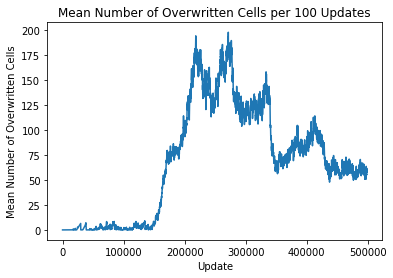

In [28]:
plt.plot(df['update'], df['mean_num_overwritten'])
plt.xlabel('Update')
plt.ylabel('Mean Number of Overwritten Cells')
plt.title('Mean Number of Overwritten Cells per 100 Updates')
plt.show()

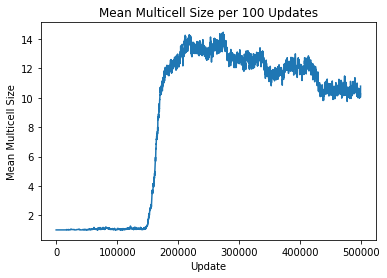

In [27]:
plt.plot(df['update'], df['mean_multicell_size'])
plt.xlabel('Update')
plt.ylabel('Mean Multicell Size')
plt.title('Mean Multicell Size per 100 Updates')
plt.show()

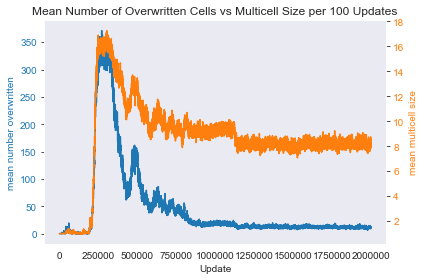

In [8]:
#https://matplotlib.org/gallery/api/two_scales.html
sns.set_style('dark')
# create an axis using subplots and plot the first variable
fig, ax1 = plt.subplots()
ax1.set_xlabel('Update')
ax1.set_ylabel('mean number overwritten', color='tab:blue')
ax1.plot(df['update'], df['mean_num_overwritten'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # makes a second y axis with the same x-axis

# use the second axis to plot the second variable
ax2.set_ylabel('mean multicell size', color='tab:orange')
ax2.plot(df['update'], df['mean_multicell_size'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('Mean Number of Overwritten Cells vs Multicell Size per 100 Updates')
fig.tight_layout()
plt.show()

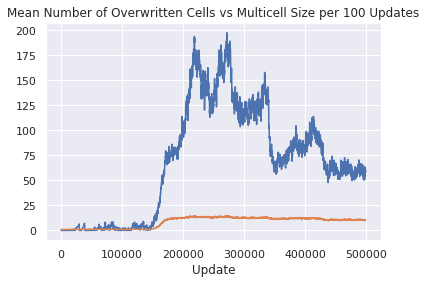

In [29]:
# old nontwo scaled code
sns.set()
plt.plot(df['update'], df['mean_num_overwritten'], label='mean number overwritten')
plt.plot(df['update'], df['mean_multicell_size'], label='mean multicell size')
plt.xlabel('Update')
# plt.ylabel('Mean Number of Overwritten Cells')
plt.title('Mean Number of Overwritten Cells vs Multicell Size per 100 Updates')
plt.show()

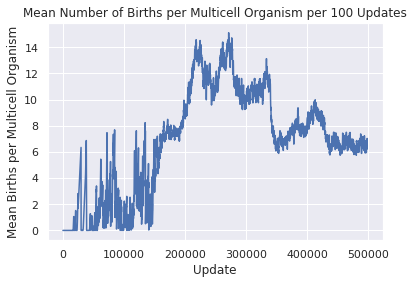

In [62]:
# multicell births over time standard plot
plt.plot(df['update'], df['mean_births_per_mc_cell'])
plt.xlabel('Update')
plt.ylabel('Mean Births per Multicell Organism')
plt.title('Mean Number of Births per Multicell Organism per 100 Updates')
plt.show()

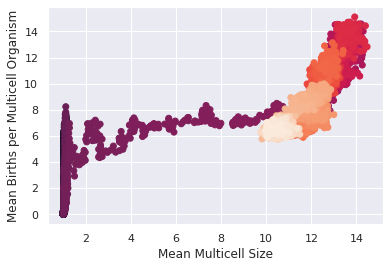

In [70]:
fig, ax = plt.subplots()
ax.scatter(df['mean_multicell_size'], df['mean_births_per_mc_cell'],c=df['update'],marker="o", picker=True)
plt.xlabel('Mean Multicell Size')
plt.ylabel('Mean Births per Multicell Organism')
plt.show()

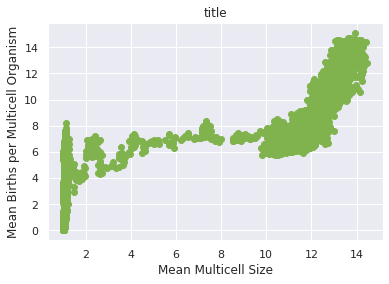

In [66]:
plt.plot(df['mean_multicell_size'], df['mean_births_per_mc_cell'], 'ro', color=(0.5, 0.7, 0.3))
plt.xlabel('Mean Multicell Size')
plt.ylabel('Mean Births per Multicell Organism')
plt.title('title')
plt.show()

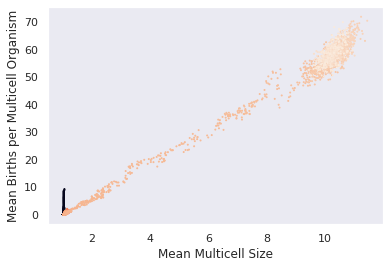

In [89]:
fig, ax = plt.subplots()
ax.scatter(df['mean_multicell_size'], df['mean_num_overwritten'],c=df['update'],marker="o", s = 1.0, picker=True)
plt.xlabel('Mean Multicell Size')
plt.ylabel('Mean Births per Multicell Organism')
plt.show()

In [53]:
# code to copy specific columns and get rid of zeros for later manipulation
workload = df['mean_mc_workload']
rep_time = df['mean_mc_rep_time']
truth = np.zeros_like(workload)
for i in range(len(workload)):
    if workload[i]>0 and rep_time[i]>0:
        truth[i]=1
workload = workload[truth==1]
rep_time = rep_time[truth==1]
print(len(workload),len(rep_time)) # check to make sure they are still the same length


3521 3521


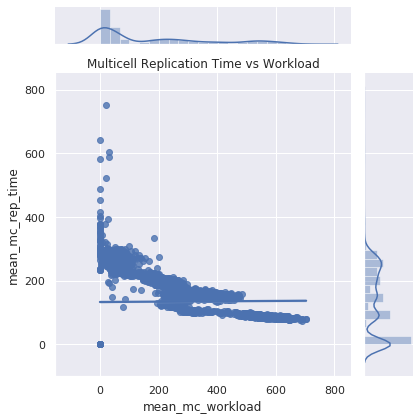

In [54]:
# seaborn jointplot with automated linear regression and histograms
workload = df['mean_mc_workload']
rep_time = df['mean_mc_rep_time']
sns.jointplot(workload,rep_time,kind = 'reg')
plt.title('Multicell Replication Time vs Workload')
plt.tight_layout()

In [55]:
# standard plot of scaled down variable with 5th order polynomial fit
params = np.polyfit(np.log10(workload),np.log10(rep_time),5)
repfunc = np.poly1d(params)
arr = np.arange(-.8,3,0.1)
plt.plot(arr,repfunc(arr),color = 'orange')

plt.scatter(np.log10(workload),np.log10(rep_time))
plt.title('Log of Multicell Replication Time vs Workload (filtered zeros)')
plt.xlabel('Mean Multicell Workload')
plt.ylabel('Mean Multicell Replication Time')
plt.tight_layout()

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/lib/polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


ValueError: On entry to DLASCL parameter number 4 had an illegal value

Germ Cell Number vs Multicell Workload


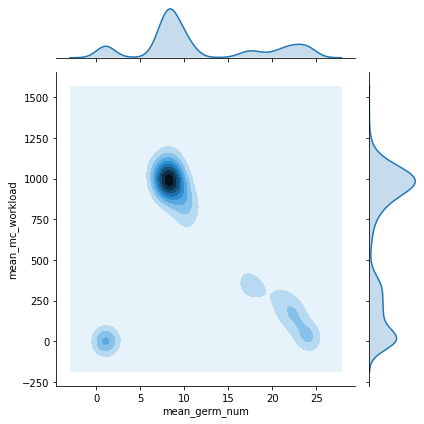

In [11]:
# clustered seaborn jointplot
workload = df['mean_mc_workload']
germs = df['mean_germ_num']

print('Germ Cell Number vs Multicell Workload')
sns.jointplot(germs,workload,kind='kde')

plt.tight_layout()

In [80]:
columns_to_plot = [ \
       'mean_rep_time', 'mean_res', 'mean_multicell_size',
       'mean_mc_tissue_rep_attempts', 'mean_births_per_mc_cell', 'mean_germ_num', 'mean_soma_num', 'mean_pop_num',
       'mean_germ_percent', 'mean_germ_workload', 'mean_germ_workload_var',
       'mean_soma_workload', 'mean_soma_workload_var', 'replication_count',
       'mean_uni_rep_time', 'mean_uni_workload', 'mean_mc_rep_time',
       'mean_mc_workload', 'num_uni', 'num_multi', 'num_uni_repro',
       'num_multi_repro', 'mean_uni_index', 'mean_multi_index', 'num_orgs',
       'mean_generation']

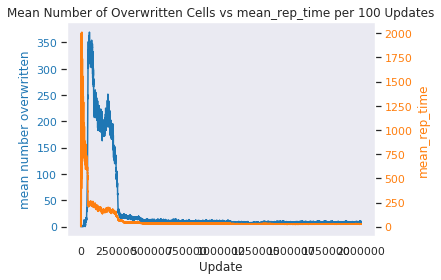

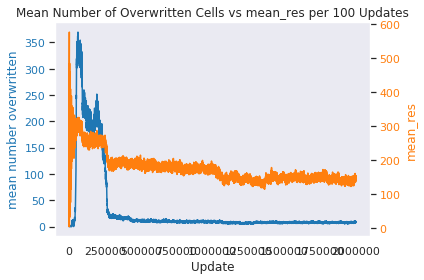

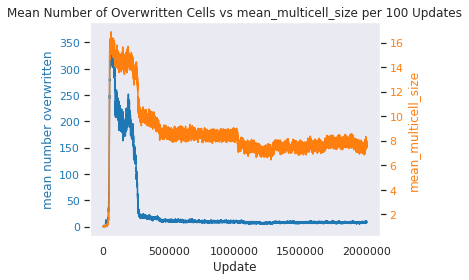

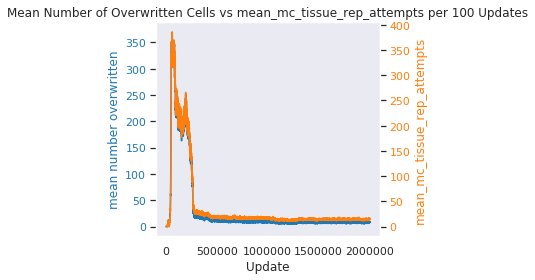

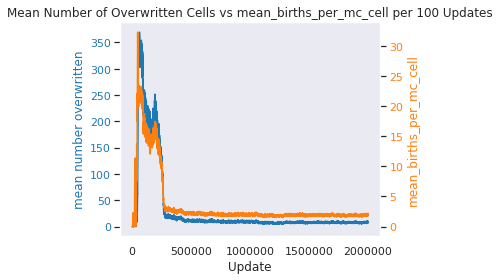

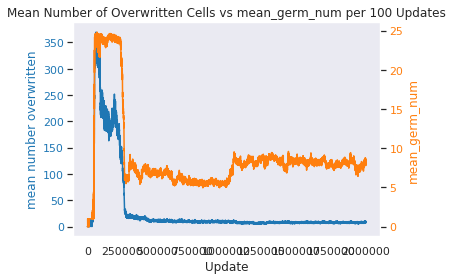

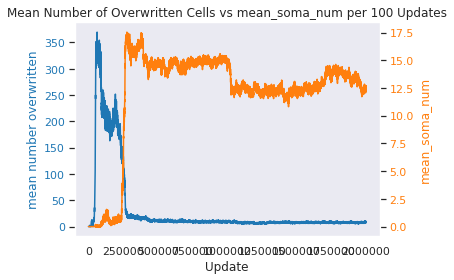

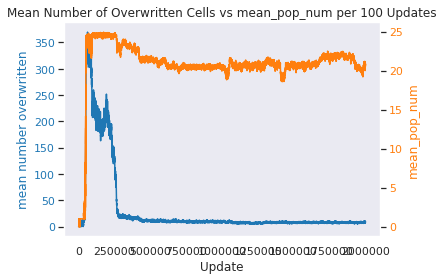

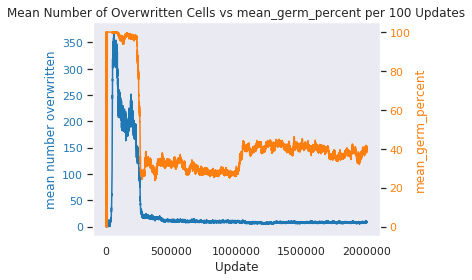

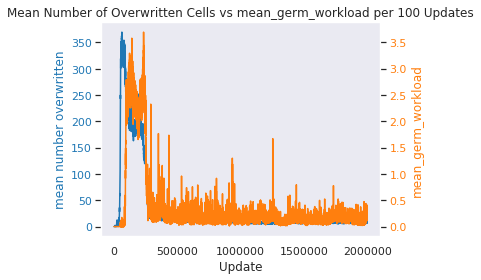

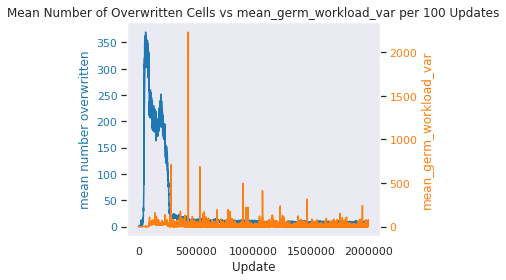

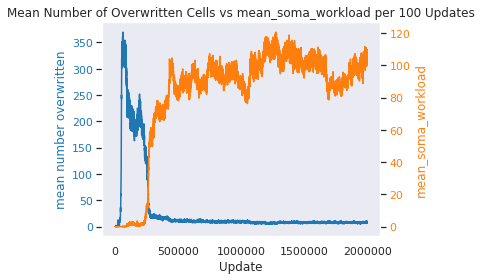

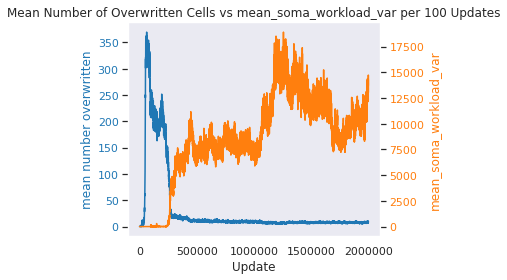

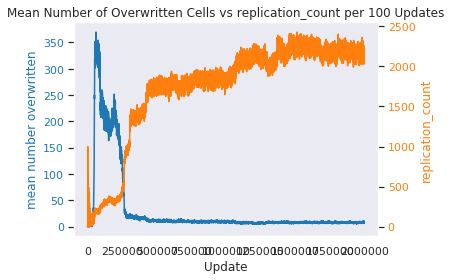

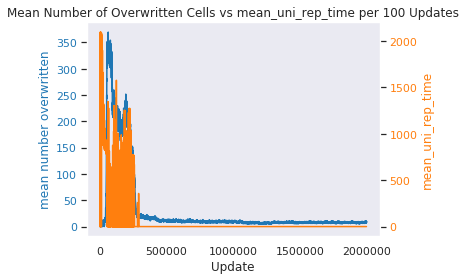

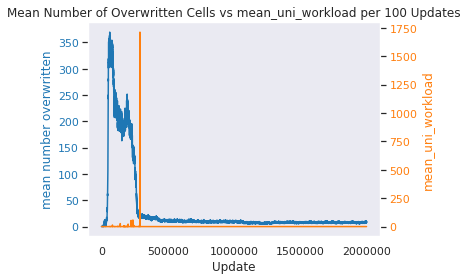

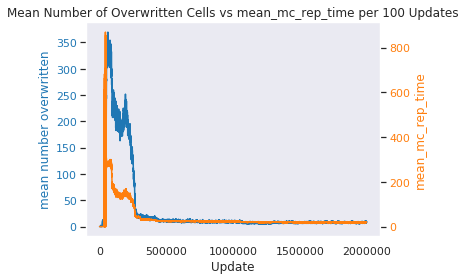

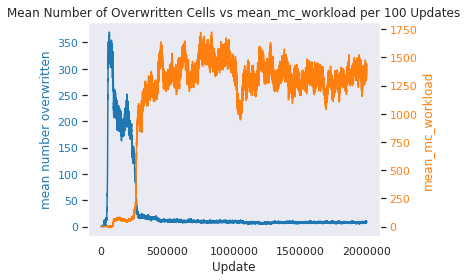

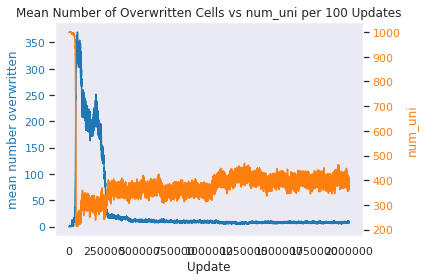

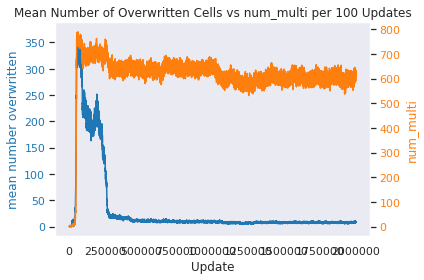

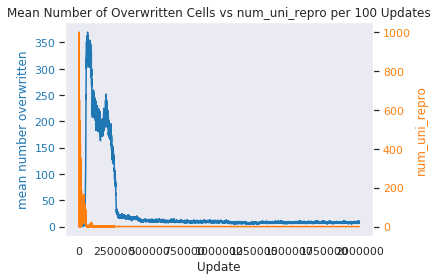

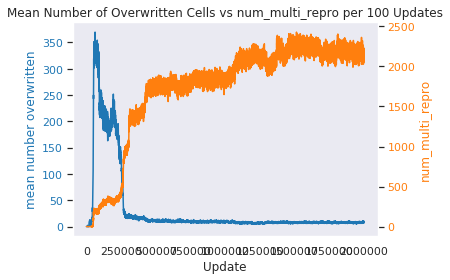

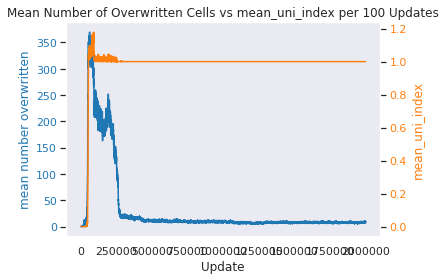

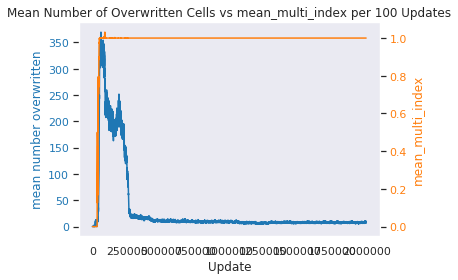

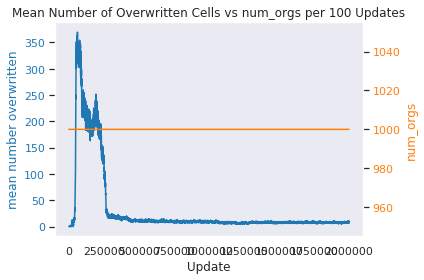

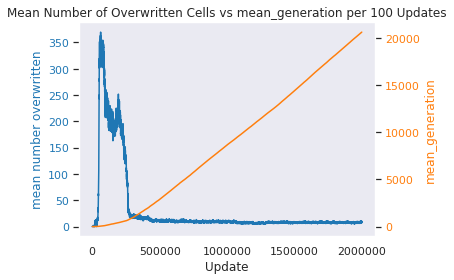

In [125]:
#https://matplotlib.org/gallery/api/two_scales.html
sns.set_style('dark')
for column_name in columns_to_plot:
    # create an axis using subplots and plot the first variable
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Update')
    ax1.set_ylabel('mean number overwritten', color='tab:blue')
    ax1.plot(df['update'], df['mean_num_overwritten'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # makes a second y axis with the same x-axis


    # use the second axis to plot the second variable
    ax2.set_ylabel(column_name, color='tab:orange')
    ax2.plot(df['update'], df[column_name], color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    plt.title('Mean Number of Overwritten Cells vs ' + column_name + ' per 100 Updates')
    fig.tight_layout()
    plt.show()

In [108]:
max(df['update'])

1999900

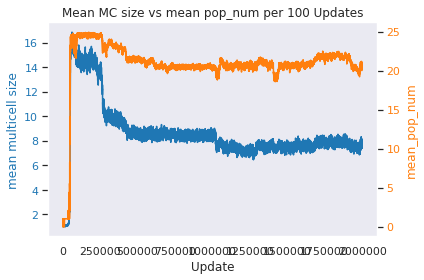

In [127]:
#https://matplotlib.org/gallery/api/two_scales.html
sns.set_style('dark')

# create an axis using subplots and plot the first variable
fig, ax1 = plt.subplots()
ax1.set_xlabel('Update')
ax1.set_ylabel('mean multicell size', color='tab:blue')
ax1.plot(df['update'], df['mean_multicell_size'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # makes a second y axis with the same x-axis


# use the second axis to plot the second variable
ax2.set_ylabel('mean_pop_num', color='tab:orange')
ax2.plot(df['update'], df['mean_pop_num'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('Mean MC size vs mean pop_num per 100 Updates')
fig.tight_layout()
plt.show()